In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
    name=fn, length=len(uploaded[fn])))

Saving OldFaithfulCMU.txt to OldFaithfulCMU.txt
User uploaded file "OldFaithfulCMU.txt" with length 6254 bytes


In [17]:
from sklearn.metrics import pairwise_distances

def Estep(data, means):
    distances = pairwise_distances(data, means, metric='euclidean')
    resp = np.argmin(distances, axis=1)
    return resp

def Mstep(data, k, resp):
    means=[]
    for i in range(k):
        Data2 = data[resp==i]
        means.append(Data2.mean(axis=0))
    return np.array(means)

def distortionMeasure(data, k, means, resp):
    distM = 0
    for i in range(k):
        subData = data[resp==i]
        dist = pairwise_distances(subData, [means[i]], metric='euclidean')
        distM = distM + np.sum(dist**2)
    return distM

def kmeans_fn(data, initMeans, iters=100, relgap = 1e-4, verbose=False, oldFaith=False):
    K = len(initMeans)
    resp = [0] * len(data)
    if oldFaith:
        plotData = []
        plotData.append([resp, initMeans])
    means = initMeans
    
    
    distortion = 0
    distortion_old = 0
    
    for i in range(iters):
        if verbose and (i%5 ==0):
            print("Iteration: {}".format(i))
        
        resp =  Estep(data, means)
        if oldFaith and i<4:
            plotData.append([resp, means])
        
        means = Mstep(data, K, resp)
        if oldFaith and i<4:
            plotData.append([resp, means])
        
        distortion = distortionMeasure(data, K, means, resp)
    
    if oldFaith:
        return (means, resp, plotData)
    
    else:
        return (means, resp)

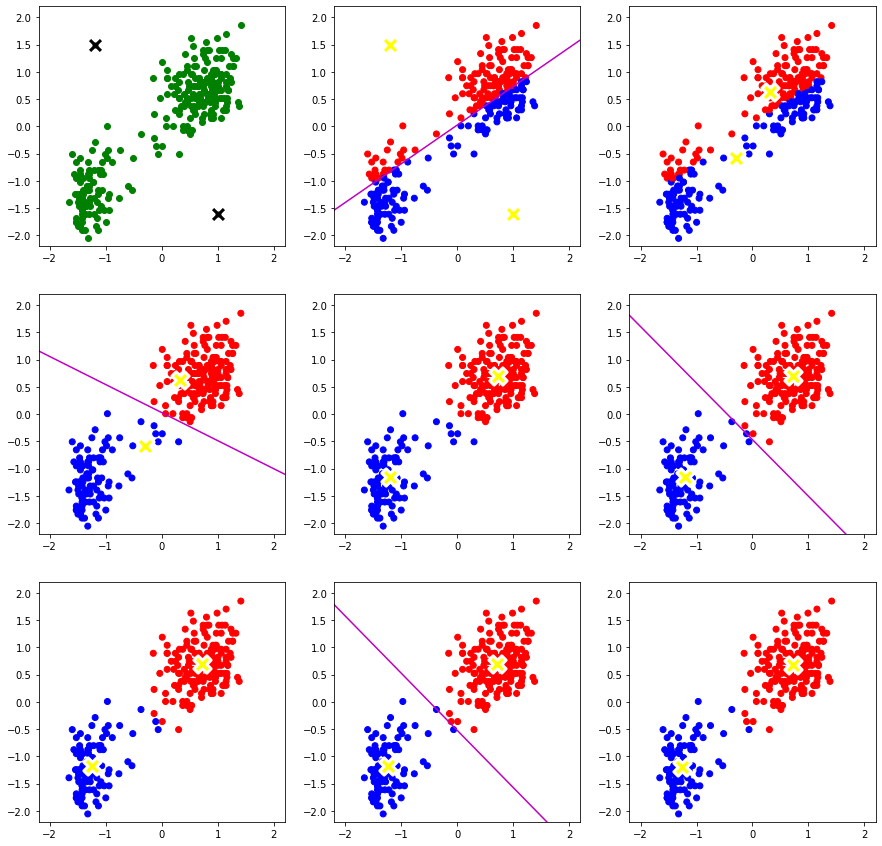

In [18]:

# Initializing
from sklearn.preprocessing import StandardScaler
fitData = StandardScaler().fit(ff[:,1:])
tempd = fitData.transform(ff[:,1:])
dataOF = np.append(ff, tempd, axis=1)


def divide(ctrs):
    m = (ctrs[0,1]-ctrs[1,1])/(ctrs[0,0]-ctrs[1,0])
    c = ((ctrs[0,1]+ctrs[1,1])+(ctrs[0,0]+ctrs[1,0])/m )/2
    return np.array([[-3, 3/m+c],[3, -3/m+c]])


#Implementation
initCenters = np.array([[-1.2, 1.5],[1.0, -1.6]])
ms, resp, pDs = kmeans_fn(dataOF[:,3:], initCenters, oldFaith=True)

colors={0: "red", 1:"blue"}
plt.figure(figsize=(15,15))
for i in range(len(pDs)):
    plt.subplot(3,3,i+1)
    if i==0:
        plt.xlim(xmax=2.2, xmin=-2.2)
        plt.ylim(ymax=2.2, ymin=-2.2)
        plt.scatter(dataOF[:,3], dataOF[:,4],c='green')
        plt.scatter(pDs[i][1][:,0], pDs[i][1][:,1], s = 300, c='black', marker="X", edgecolors="white", linewidth=3)
    else:
        plt.xlim(xmax=2.2, xmin=-2.2)
        plt.ylim(ymax=2.2, ymin=-2.2)
        plt.scatter(dataOF[:,3], dataOF[:,4],c=list(map(lambda x:colors[x], pDs[i][0])))
        plt.scatter(pDs[i][1][:,0], pDs[i][1][:,1], s = 300, c='Green', marker="X", edgecolors="white", linewidth=3) #
        if (i+1)%2==0:
            b = divide(pDs[i][1])
            plt.plot(b[:,0], b[:,1], 'm-')